# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [4]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [6]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

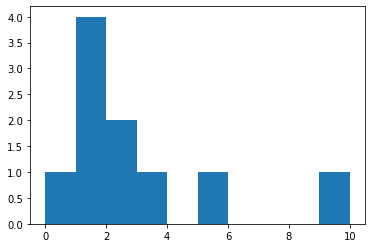

In [10]:
plt.hist(X[1]);

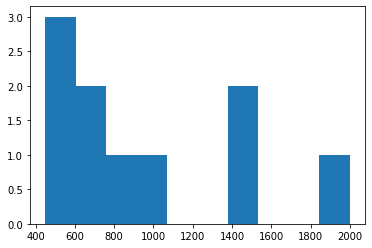

In [11]:
plt.hist(X[2]);

In [13]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [14]:
X_st = X.copy().astype(np.float64)

In [15]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

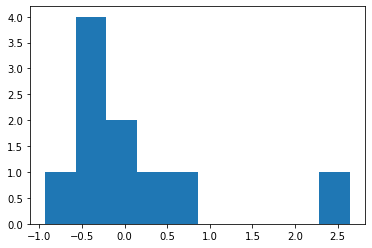

In [16]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

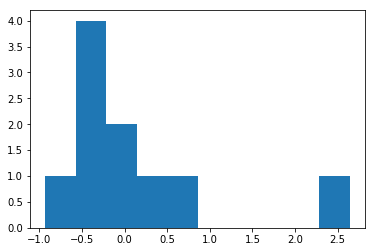

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 99.31559116781038, веса: [49.88122865  4.61828144  3.5841532   3.39700525]
# итерация: 200, MSE: 41.28175899022533, веса: [56.40286388  4.88854911  3.24144592  3.51326804]
# итерация: 300, MSE: 40.12236073729436, веса: [57.26776025  5.10061153  2.94384751  3.60281166]
# итерация: 400, MSE: 40.005422746571696, веса: [57.38246242  5.27556099  2.6949593   3.68000202]
# итерация: 500, MSE: 39.93615070500498, веса: [57.39767417  5.42007249  2.48686629  3.74630935]
# итерация: 600, MSE: 39.888122608711505, веса: [57.39969155  5.53955646  2.31290223  3.80307389]
# итерация: 700, MSE: 39.85467055103503, веса: [57.39995909  5.63843476  2.16748504  3.85152665]
# итерация: 800, MSE: 39.831363396047294, веса: [57.39999457  5.72032748  2.04594182  3.89278002]
# итерация: 900, MSE: 39.81512169486399, веса: [57.39999928  5.78820308  1.94436174  3.92782653]
# итерация: 1000, MSE: 39.80380200073757, веса: [57.3999999   5.84449925  1.85947247  3.95754298]


array([57.3999999 ,  5.84449925,  1.85947247,  3.95754298])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.41921192236887, веса: [57.39648638  5.17534883  2.63919599  3.86460671]
# итерация: 1000, MSE: 39.62367877808175, веса: [57.39822432  5.78365068  1.92002613  3.98165508]
# итерация: 1500, MSE: 38.84598186610661, веса: [57.39795921  6.00550137  1.62448162  4.05813027]
# итерация: 2000, MSE: 38.51486198361439, веса: [57.39785667  6.08944326  1.50365726  4.09620523]
# итерация: 2500, MSE: 38.37617284571795, веса: [57.39781629  6.12202485  1.45441361  4.11336668]
# итерация: 3000, MSE: 38.318767702514435, веса: [57.39780021  6.13488512  1.43438028  4.12074613]
# итерация: 3500, MSE: 38.29518890030421, веса: [57.39779376  6.14001557  1.42623918  4.12384145]
# итерация: 4000, MSE: 38.28555045918608, веса: [57.39779116  6.14207588  1.42293296  4.12512193]
# итерация: 4500, MSE: 38.281622118581176, веса: [57.39779011  6.14290664  1.42159078  4.12564743]
# итерация: 5000, MSE: 38.28002392438039, веса: [57.39778969  6.14324244  1.42104604  4.1258621 ]


array([57.39778969,  6.14324244,  1.42104604,  4.1258621 ])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [57]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    diff = 0
    err_prev = 10000
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        diff = err_prev - err
        err_prev = err
        if diff < 0.001:
            break
        if i % 100 == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [54]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.807231204063974, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280037, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.7785235657889, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617128, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.77777930470261, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405893, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.777755943216036, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.777754760507676, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

##### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [39]:
lmbd_lst = np.logspace (-10, 0, 7)
lmbd_lst

array([1.00000000e-10, 4.64158883e-09, 2.15443469e-07, 1.00000000e-05,
       4.64158883e-04, 2.15443469e-02, 1.00000000e+00])

# итерация: 100, MSE: 100.15332720432711, веса: [49.8535115   3.66668135  3.48290916  4.46269156]
# итерация: 200, MSE: 41.521924794340364, веса: [56.39918804  4.16741325  3.166684    4.31348189]
# итерация: 300, MSE: 40.25688819717003, веса: [57.26727276  4.55529967  2.89027948  4.20488959]
# итерация: 400, MSE: 40.08337439140503, веса: [57.38239777  4.86307305  2.65691244  4.13291608]
# итерация: 100, MSE: 100.15332839532579, веса: [49.85351142  3.66668135  3.48290915  4.46269155]
# итерация: 200, MSE: 41.52192503648142, веса: [56.39918793  4.16741324  3.166684    4.31348188]
# итерация: 300, MSE: 40.2568882335447, веса: [57.26727263  4.55529966  2.89027948  4.20488958]
# итерация: 400, MSE: 40.08337439925453, веса: [57.38239764  4.86307304  2.65691244  4.13291607]
# итерация: 100, MSE: 100.1533836765885, веса: [49.8535078   3.66668129  3.48290905  4.46269128]
# итерация: 200, MSE: 41.521936275703894, веса: [56.39918241  4.16741315  3.166684    4.31348153]
# итерация: 300, MSE: 40.25

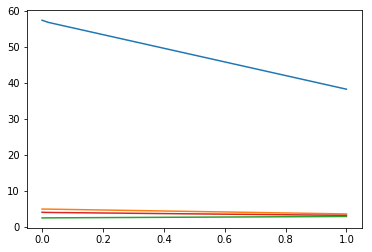

In [58]:
w_lst = []

for lmbd in lmbd_lst:
    w = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=lmbd)
    w_lst.append(w)
    
w_lst = np.array(w_lst)

for i in range(len(w_lst[0])):
    plt.plot(lmbd_lst, w_lst[:, i])
    
plt.show()

##### 2. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [59]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    diff = 0
    err_prev = 10000
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        diff = err_prev - err
        err_prev = err
        if diff < 0.001:
            break
        if i % 100 == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [60]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 100, MSE: 100.15399586441184, веса: [49.85346813  3.66666421  3.48289126  4.46267261]
# итерация: 200, MSE: 41.52202506554043, веса: [56.39913893  4.16739559  3.16666683  4.31346253]
# итерация: 300, MSE: 40.25690199911283, веса: [57.26722288  4.55528163  2.89026296  4.20486994]
# итерация: 400, MSE: 40.08337665284535, веса: [57.38234779  4.8630547   2.65689646  4.1328962 ]


array([57.39391678,  4.99974369,  2.5484209 ,  4.10584075])